Bulls.csv 는 경매시장에서 거래된 76마리의 어린(2살 이하) 황소의 특성과 거래가격(SalePr)에 관한 자료이다. 변수 설명은 아래와 같다.
-	Breed=1 if Angus, 5 if Hereford, 8 if Simental
-	FtFrBody=fat free body (pounds)
-	Frame=Scale from 1(small) to 8 (large)
-	SaleHt=Sale height at shoulder (inches)
-	YrHgt=Yearling height at shoulder (inches)
-	PrctFFB=Percent fat-free body
-	BkFat=Back fat (inches)
-	SaleWt=Sale weight (pounds)

SalePr와 Breed 변수를 제외한 7개의 변수의 상관계수 행렬을 사용하여 주성분분석을 시행하고 아래의 질문에 답하시오. 


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA # 주성분 분석
from sklearn.preprocessing import StandardScaler # 표준화

data_path = '../data/'

In [6]:
data = pd.read_csv(data_path + 'bulls.csv')

In [11]:
data.head()

,Breed,SalePr,YrHgt,FtFrBody,PrctFFB,Frame,BkFat,SaleHt,SaleWt
0,1,2200,51.0,1128,70.9,7,0.25,54.8,1720
1,1,2250,51.9,1108,72.1,7,0.25,55.3,1575
2,1,1625,49.9,1011,71.6,6,0.15,53.1,1410
3,1,4600,53.1,993,68.9,8,0.35,56.4,1595
4,1,2150,51.2,996,68.6,7,0.25,55.0,1488


In [10]:
newdata = data.iloc[:,2:]

1. 각 주성분의 분산을 사용하여 scree plot을 그리고 누적분산 설명비율을 계산하시오. 적절한 주성분의 개수는 무엇인가? 

In [12]:
data_scale = StandardScaler().fit_transform(newdata)

In [13]:
pca = PCA().fit(data_scale)

In [15]:
np.cumsum(pca.explained_variance_ratio_) # 70%이상 최소차원 2개

array([0.58867113, 0.7796896 , 0.8856014 , 0.945805  , 0.9723487 ,
       0.99327761, 1.        ])

In [17]:
pca.explained_variance_ # 고유값이 1보다 큰 것 기준으로 하면 2개, 0.7 기준 3개

array([4.17564057, 1.35495769, 0.75126765, 0.42704422, 0.18828334,
       0.14845573, 0.04768413])

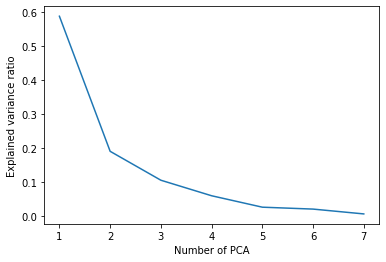

In [16]:
plt.plot(np.arange(1,data_scale.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

2.	첫 두 개의 주성분을 계산하는데 사용된 rotation값을 찾으시오.

In [18]:
pca.components_[0]

array([ 0.44993132,  0.41232559,  0.35556181,  0.4339569 , -0.1867048 ,
        0.45285382,  0.26994696])

In [19]:
pca.components_[1]

array([-0.04279022,  0.12983655, -0.31550779,  0.00772821,  0.71471936,
        0.10131509,  0.60051483])

3.	각 주성분의 rotation값을 barplot을 사용해 비교하고 주성분의 의미를 해석하시오.

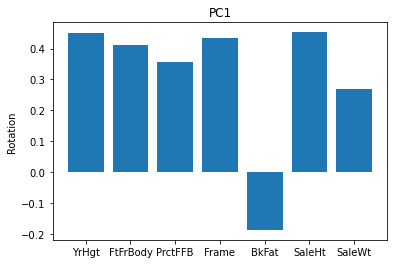

In [21]:
plt.bar(x=newdata.columns, height=pca.components_[0])
plt.title('PC1')
plt.ylabel('Rotation')
plt.show()

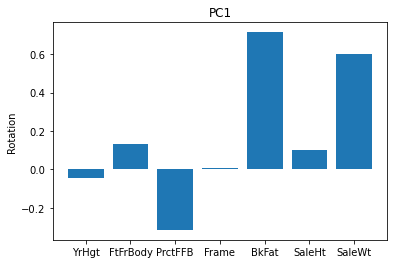

In [22]:
plt.bar(x=newdata.columns, height=pca.components_[1])
plt.title('PC1')
plt.ylabel('Rotation')
plt.show()

4.	행렬도를 사용해 원변수와 주성분의 관계, 원변수 간의 상관관계, 특이한 관측치의 존재 유무 등을 파악하고 설명하시오. 

In [23]:
def biplot(score,coeff, labels=None, index = newdata.index):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], str(i))
        else:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], index[i])

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [24]:
x_reduced = pca.transform(data_scale)

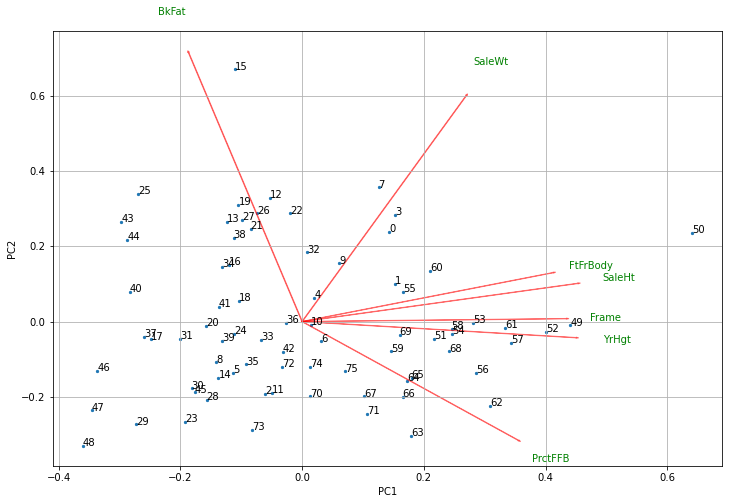

In [25]:
plt.figure(figsize=(12,8))
biplot(x_reduced[:,0:2],np.transpose(pca.components_[0:2, :]), newdata.columns )

5.	첫 두 개의 주성분을 사용해 산점도를 그리고 Breed를 서로 다른 색깔과 기호로 표시하시오. 주성분에 의해 다른 종의 황소를 구분할 수 있는가? 이상점이 있는가? 있다면 어떤 특성을 가진 소인가?

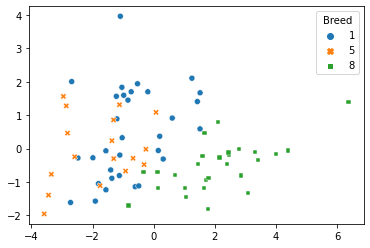

In [27]:
sns.scatterplot(x = x_reduced[:,0], y = x_reduced[:,1],# x는 pc1, # y는 pc2
               hue = data.Breed.astype('category'),
               style = data.Breed)
plt.show()